# Install Requierement

In [52]:
!pip install opendatasets

In [53]:
import opendatasets as od

In [3]:
od.download('https://www.kaggle.com/datasets/shankarpriya2913/crop-and-soil-dataset')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aihandra
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/shankarpriya2913/crop-and-soil-dataset


100%|██████████| 107k/107k [00:00<00:00, 144MB/s]

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score, recall_score

In [35]:
df = pd.read_csv('/content/crop-and-soil-dataset/data_core.csv')

# Data Understanding

Menampilkan info dataset

In [55]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temparature      8000 non-null   float64
 1   Humidity         8000 non-null   float64
 2   Moisture         8000 non-null   float64
 3   Soil Type        8000 non-null   int64  
 4   Crop Type        8000 non-null   int64  
 5   Nitrogen         8000 non-null   int64  
 6   Potassium        8000 non-null   int64  
 7   Phosphorous      8000 non-null   int64  
 8   Fertilizer Name  8000 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 562.6 KB


,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26.0,52.0,38.0,4,3,37,0,0,6
1,29.0,52.0,45.0,2,8,12,0,36,5
2,34.0,65.0,62.0,0,1,7,9,30,1
3,32.0,62.0,34.0,3,9,22,0,20,4
4,28.0,54.0,46.0,1,6,35,0,0,6


Insight: Tidak ditemui missing value, data terdiri dari interger dan float serta terdapat 8000 baris dan 9 fitur

Memuat tabel distribusi label tanaman

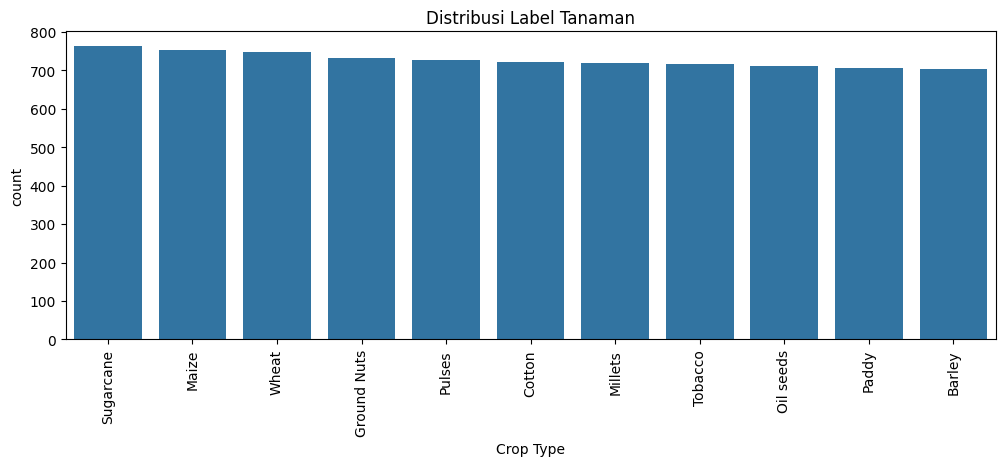

In [8]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Crop Type', order=df['Crop Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribusi Label Tanaman')
plt.show()


Insight: Tidak ditemukan perbedaan signifikan terhadap jumlah data pada setiap fitur, rentangnya diantara 700 s.d. 750

Menampilkan distribusi label tanah

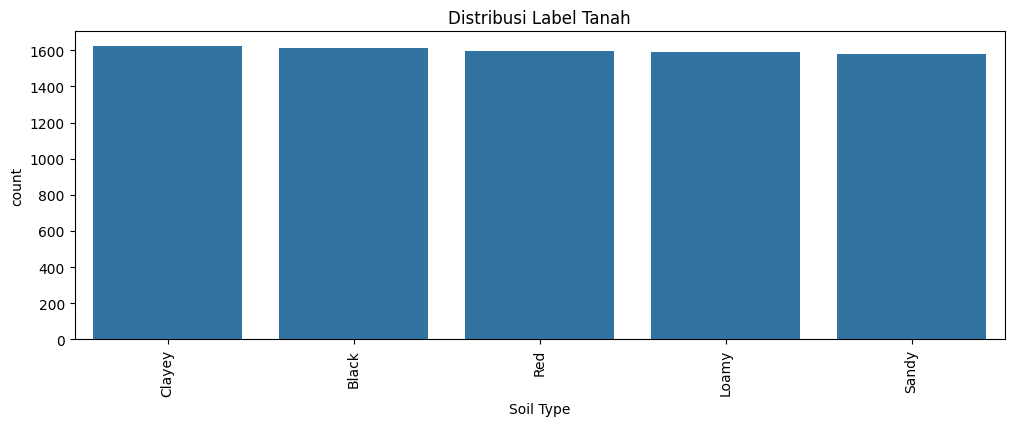

In [9]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Soil Type', order=df['Soil Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribusi Label Tanah')
plt.show()

Insight: Distribusi label tanah tidak jauh berbeda, semua label memiliki jumlah sekitar 1600 data

Memuat distribusi label pupuk

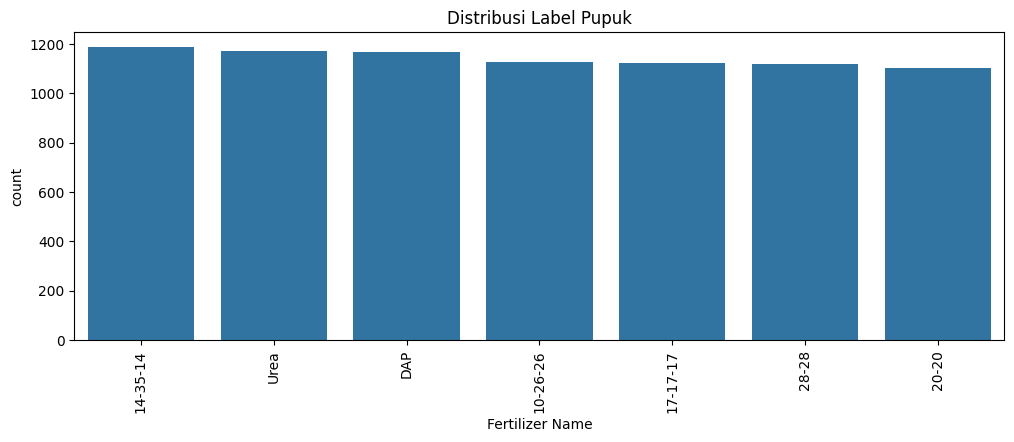

In [10]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Fertilizer Name', order=df['Fertilizer Name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribusi Label Pupuk')
plt.show()

Insight: Terlihat pada setiap label pada fitur berada pada rentang 1100 s.d. 1200 jumlah data per label

## Data Preprocessing


Numerasi fitur kategorik, dimulai dengan inisiasi encoder

In [11]:
soil_encoder = LabelEncoder()
crop_encoder = LabelEncoder()
fertilizer_encoder = LabelEncoder()

Insight: berhasil membuat fungsi untuk numerasi masing2 fitur kategorik

Encoding fitur Soil Type, Crop Type, Fertilizer Name


In [12]:
df['Soil Type'] = soil_encoder.fit_transform(df['Soil Type'])
df['Crop Type'] = crop_encoder.fit_transform(df['Crop Type'])
df['Fertilizer Name'] = fertilizer_encoder.fit_transform(df['Fertilizer Name'])


Insight: berhasil menerapkan fungsi numerasi untuk masing2 fitur kategorik

Menampilkan hasil numerasi fitur kategorik

In [13]:
soil_mapping = dict(zip(soil_encoder.classes_, soil_encoder.transform(soil_encoder.classes_)))
crop_mapping = dict(zip(crop_encoder.classes_, crop_encoder.transform(crop_encoder.classes_)))
fertilizer_mapping = dict(zip(fertilizer_encoder.classes_, fertilizer_encoder.transform(fertilizer_encoder.classes_)))

print("Soil Type Mapping:", soil_mapping)
print("Crop Type Mapping:", crop_mapping)
print("Fertilizer Name Mapping:", fertilizer_mapping)


Soil Type Mapping: {'Black': np.int64(0), 'Clayey': np.int64(1), 'Loamy': np.int64(2), 'Red': np.int64(3), 'Sandy': np.int64(4)}
Crop Type Mapping: {'Barley': np.int64(0), 'Cotton': np.int64(1), 'Ground Nuts': np.int64(2), 'Maize': np.int64(3), 'Millets': np.int64(4), 'Oil seeds': np.int64(5), 'Paddy': np.int64(6), 'Pulses': np.int64(7), 'Sugarcane': np.int64(8), 'Tobacco': np.int64(9), 'Wheat': np.int64(10)}
Fertilizer Name Mapping: {'10-26-26': np.int64(0), '14-35-14': np.int64(1), '17-17-17': np.int64(2), '20-20': np.int64(3), '28-28': np.int64(4), 'DAP': np.int64(5), 'Urea': np.int64(6)}


Insight: Numerasi setiap label dibuat menjadi angka 0 sampai seterusnya, sesuai dengan jumlah label pada masing2 fitur

Mengecek kembali dataset

In [14]:
print(df.head())
print(df.dtypes)

   Temparature  Humidity  Moisture  Soil Type  Crop Type  Nitrogen  Potassium  \
0         26.0      52.0      38.0          4          3        37          0   
1         29.0      52.0      45.0          2          8        12          0   
2         34.0      65.0      62.0          0          1         7          9   
3         32.0      62.0      34.0          3          9        22          0   
4         28.0      54.0      46.0          1          6        35          0   

   Phosphorous  Fertilizer Name  
0            0                6  
1           36                5  
2           30                1  
3           20                4  
4            0                6  
Temparature        float64
Humidity           float64
Moisture           float64
Soil Type            int64
Crop Type            int64
Nitrogen             int64
Potassium            int64
Phosphorous          int64
Fertilizer Name      int64
dtype: object


Insight: Terlihat semua fitur telah menjadi tipe data numerik, integer dan float

Seleksi fitur

In [76]:
features = df.drop(columns=['Crop Type', 'Fertilizer Name'])

Insight: mengecualikan 'Crop Type' dan 'Fertilizer Name' karena akan menjadi data target

Standarisasi fitur numerik

In [79]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

Insight: standarisasi semua fitur kecuali data target

Menyimpan nilai 'Crop_Labels' dan 'Fertilizer Name'

In [78]:
crop_labels = df['Crop Type'].values
fertilizer_labels = df['Fertilizer Name'].values

## Model Development

Cosine Similarity

In [80]:
similarity_matrix = cosine_similarity(features_scaled)


Insight: Melakukan perhitungan similarity antar semua data kecuali yang dijadikan label

Mendapatkan Rekomendasi

In [81]:
def recommend_crop(user_input, top_n=5):
    user_df = pd.DataFrame([user_input])
    user_scaled = scaler.transform(user_df)
    sims = cosine_similarity(user_scaled, features_scaled)[0]
    top_indices = sims.argsort()[-top_n:][::-1]
    recommended_crops = crop_encoder.inverse_transform(crop_labels[top_indices])

    return recommended_crops


Insight: mendefinisikan kode untuk menghasilkan rekomendasi terhadap label 'Crop Type'.

Melakukan percobaan model

In [82]:
sample_input = {
    'Temparature': 40.0,
    'Humidity': 50.0,
    'Moisture': 50.0,
    'Soil Type': soil_encoder.transform(['Loamy'])[0],
    'Nitrogen': 60.0,
    'Potassium': 45.0,
    'Phosphorous': 30.0}

recommend_crop(sample_input)


array(['Pulses', 'Ground Nuts', 'Cotton', 'Millets', 'Maize'],
      dtype=object)

Insight: menghasilkan rekomendasi tanaman berdasarkan fitur Temparature, Humidity, Moisture, Soil Type, Nitrogen, Potassium, Phosporus.

Membuat model yang sama untuk rekomendasi jenis pupuk

In [83]:
def recommend_fertilizer (user_input, top_n=2):
    user_df = pd.DataFrame([user_input])
    user_scaled = scaler.transform(user_df)
    sims = cosine_similarity(user_scaled, features_scaled)[0]
    top_indices = sims.argsort()[-top_n:][::-1]
    recommended_fertilizers = fertilizer_encoder.inverse_transform(fertilizer_labels[top_indices])

    return recommended_fertilizers

Insight: definisikan kode untuk membuat rekomendasi jenis pupuk berdasarkan fitur lainnya: Temparature, Humidity, Moisture, Soil Type, Nitrogen, Potassium, Phosporus.

Ujicoba model rekomendasi jenis pupuk

In [87]:
sample_input = {
    'Temparature': 40.0,
    'Humidity': 50.0,
    'Moisture': 50.0,
    'Soil Type': soil_encoder.transform(['Loamy'])[0],
    'Nitrogen': 10,
    'Potassium': 45.0,
    'Phosphorous': 30.0}

recommend_fertilizer(sample_input)

array(['28-28', '28-28'], dtype=object)

Insight: menghasilkan rekomendasi jenis pupuk berdasarkan fitur Temparature, Humidity, Moisture, Soil Type, Nitrogen, Potassium, Phosporus.

# Evaluasi

Menggunakan precision dan recall untuk model rekomendasi jenis tanaman/crop type

In [90]:
def precision_recall_at_k(df, k=5, sample_size=100):
    correct_predictions = 0
    total_relevant = 0
    total_samples = min(sample_size, len(df))

    indices = np.random.choice(df.index, size=total_samples, replace=False)

    for idx in indices:
        input_row = df.loc[idx].drop(['Crop Type', 'Fertilizer Name']).to_dict()
        true_crop = df.loc[idx, 'Crop Type']
        recommended_crops = recommend_crop(input_row, top_n=k)
        if crop_encoder.inverse_transform([true_crop])[0] in recommended_crops:
            correct_predictions += 1

        total_relevant += 1

    precision_at_k = correct_predictions / (total_samples * k)
    recall_at_k = correct_predictions / total_relevant

    return precision_at_k, recall_at_k


precision, recall = precision_recall_at_k(df, k=5, sample_size=100)
print(f"Precision@5: {precision:.2f}")
print(f"Recall@5: {recall:.2f}")

Precision@5: 0.20
Recall@5: 1.00


Insight: model hanya mampu memberikan rekommendasi dengan akurasi 20% terhadap 5 jenis tanaman. Artinya hanya memberikan hasil yang pasti benar sebanyak 1 setiap menghasilkan 5 rekomendasi

Menggunakan precision dan recall untuk model rekomendasi jenis pupuk

In [92]:
def precision_recall_at_k_fertilizer(df, k=2, sample_size=100):
    correct_predictions = 0
    total_relevant = 0
    total_samples = min(sample_size, len(df))

    indices = np.random.choice(df.index, size=total_samples, replace=False)

    for idx in indices:
        input_row = df.loc[idx].drop(['Crop Type', 'Fertilizer Name']).to_dict()
        true_fertilizer = df.loc[idx, 'Fertilizer Name']
        recommended_fertilizers = recommend_fertilizer(input_row, top_n=k)

        if fertilizer_encoder.inverse_transform([true_fertilizer])[0] in recommended_fertilizers:
            correct_predictions += 1

        total_relevant += 1

    precision_at_k = correct_predictions / (total_samples * k)
    recall_at_k = correct_predictions / total_relevant

    return precision_at_k, recall_at_k


precision_f, recall_f = precision_recall_at_k_fertilizer(df, k=2, sample_size=100)
print(f"Precision@2 (Fertilizer): {precision_f:.2f}")
print(f"Recall@2 (Fertilizer): {recall_f:.2f}")


Precision@2 (Fertilizer): 0.50
Recall@2 (Fertilizer): 1.00


Insight: model rekomendasi jenis pupuk memiliki akurasi 50%. Artinya setiap menghasilkan 2 rekomendasi, pasti terdapat 1 jenis pupuk yang benar sesuai